##### Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import numpy as np

In [44]:
# Importing dataframes

df_places_fsq = pd.read_csv('fsq_df_landmarks_outdoors.csv')

dfs = pd.read_csv('citybike_station_Como.csv')[['station_name','empty_slots','free_bikes','latitude','longitude']]
df_stations = dfs.copy()

# Check column names

print(df_places_fsq.columns)
print(df_stations.columns)


Index(['station_name', 'fsq_id', 'name', 'popularity', 'rating'], dtype='object')
Index(['station_name', 'empty_slots', 'free_bikes', 'latitude', 'longitude'], dtype='object')


In [45]:
# Aadjust column names

df_places_fsq.columns = ['station_name', 'fsq_id', 'place_name', 'place_popularity', 'place_rating']

In [49]:
# Merging dataframes together on the 'station_station_name' column

dfs = dfs.reset_index(drop=True)
df_merged = dfs.merge(df_places_fsq, how='left', on='station_name')

df_merged

,station_name,empty_slots,free_bikes,latitude,longitude,fsq_id,place_name,place_popularity,place_rating
0,02 - Funicolare,5,2,45.817493,9.082644,4db6b6ec43a1369cb5eb542f,Piazza del Duomo,0.976956,8.7
1,02 - Funicolare,5,2,45.817493,9.082644,4be5e56b2457a593af2eac15,Piazza Cavour,0.995855,8.3
2,02 - Funicolare,5,2,45.817493,9.082644,55b63156498e872b9236ed16,Life Electric,0.990406,7.9
3,02 - Funicolare,5,2,45.817493,9.082644,4e0460d47d8b00eb78c10f0e,Monumento ai Caduti,0.991711,8.2
4,02 - Funicolare,5,2,45.817493,9.082644,4c4b16b75609c9b6321ea590,Piazza Alessandro Volta,0.997347,7.8
...,...,...,...,...,...,...,...,...,...
553,11 - Como Nord Lago,8,2,45.814693,9.083188,ff3f9187cb8e448cbf7c73b0,Evento storico,0.652174,NaN
554,11 - Como Nord Lago,8,2,45.814693,9.083188,b82bd02b4b09467c3cbb2ca6,Campisani Marcello,NaN,NaN
555,11 - Como Nord Lago,8,2,45.814693,9.083188,875d81a7bde04f8c8f50053b,Piazza Cavour SRL,NaN,NaN
556,11 - Como Nord Lago,8,2,45.814693,9.083188,a054d7ff120541a8ac9d8b62,Novocomum,NaN,NaN


In [50]:
# Adding information about average of rating, popularity, and numper of places for each bike station

df_merged['place_popularity_avg'] = df_places_fsq_merged.groupby('station_name')['place_popularity'].transform('mean')
df_merged['place_rating_avr'] = df_places_fsq_merged.groupby('station_name')['place_rating'].transform('mean')
df_merged['number_places'] = df_places_fsq_merged.groupby('station_name')['station_name'].transform('count')

df_merged

,station_name,empty_slots,free_bikes,latitude,longitude,fsq_id,place_name,place_popularity,place_rating,place_popularity_avg,place_rating_avr,number_places
0,02 - Funicolare,5,2,45.817493,9.082644,4db6b6ec43a1369cb5eb542f,Piazza del Duomo,0.976956,8.7,0.790323,7.912500,47
1,02 - Funicolare,5,2,45.817493,9.082644,4be5e56b2457a593af2eac15,Piazza Cavour,0.995855,8.3,0.790323,7.912500,47
2,02 - Funicolare,5,2,45.817493,9.082644,55b63156498e872b9236ed16,Life Electric,0.990406,7.9,0.790323,7.912500,47
3,02 - Funicolare,5,2,45.817493,9.082644,4e0460d47d8b00eb78c10f0e,Monumento ai Caduti,0.991711,8.2,0.790323,7.912500,47
4,02 - Funicolare,5,2,45.817493,9.082644,4c4b16b75609c9b6321ea590,Piazza Alessandro Volta,0.997347,7.8,0.790323,7.912500,47
...,...,...,...,...,...,...,...,...,...,...,...,...
553,11 - Como Nord Lago,8,2,45.814693,9.083188,ff3f9187cb8e448cbf7c73b0,Evento storico,0.652174,NaN,0.804376,7.855556,50
554,11 - Como Nord Lago,8,2,45.814693,9.083188,b82bd02b4b09467c3cbb2ca6,Campisani Marcello,NaN,NaN,0.804376,7.855556,50
555,11 - Como Nord Lago,8,2,45.814693,9.083188,875d81a7bde04f8c8f50053b,Piazza Cavour SRL,NaN,NaN,0.804376,7.855556,50
556,11 - Como Nord Lago,8,2,45.814693,9.083188,a054d7ff120541a8ac9d8b62,Novocomum,NaN,NaN,0.804376,7.855556,50


In [52]:
df_eda = df_merged.copy()
df_eda.head(5)

,station_name,empty_slots,free_bikes,latitude,longitude,fsq_id,place_name,place_popularity,place_rating,place_popularity_avg,place_rating_avr,number_places
0,02 - Funicolare,5,2,45.817493,9.082644,4db6b6ec43a1369cb5eb542f,Piazza del Duomo,0.976956,8.7,0.790323,7.9125,47
1,02 - Funicolare,5,2,45.817493,9.082644,4be5e56b2457a593af2eac15,Piazza Cavour,0.995855,8.3,0.790323,7.9125,47
2,02 - Funicolare,5,2,45.817493,9.082644,55b63156498e872b9236ed16,Life Electric,0.990406,7.9,0.790323,7.9125,47
3,02 - Funicolare,5,2,45.817493,9.082644,4e0460d47d8b00eb78c10f0e,Monumento ai Caduti,0.991711,8.2,0.790323,7.9125,47
4,02 - Funicolare,5,2,45.817493,9.082644,4c4b16b75609c9b6321ea590,Piazza Alessandro Volta,0.997347,7.8,0.790323,7.9125,47


In [63]:
# df_merged.drop(['latitude','longitude','fsq_id','place_name'],axis=1,inplace=True)

In [85]:
# Saving dataframe to csv file

df_merged.to_csv(path_or_buf='df_merged.csv',index=False)

##### Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [73]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

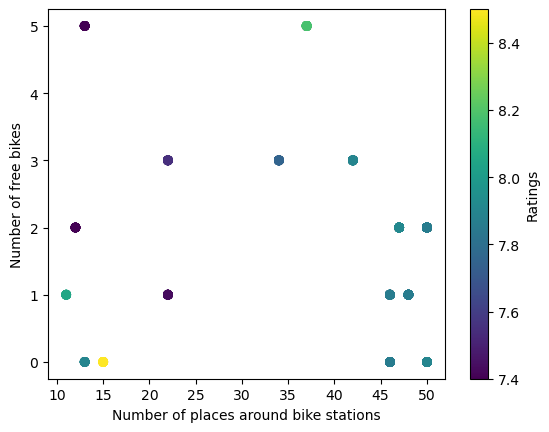

In [87]:
# Creating scatter plot

plt.scatter(df_merged['number_places'], df_merged['free_bikes'], c=df_merged['place_rating_avr'], cmap='viridis')

plt.xlabel('Number of places around bike stations')
plt.ylabel('Number of free bikes')

# Adding a colorbar to indicate the number of ratings
cbar = plt.colorbar()
cbar.set_label('Ratings')

plt.show()

Text(0, 0.5, 'Probability')

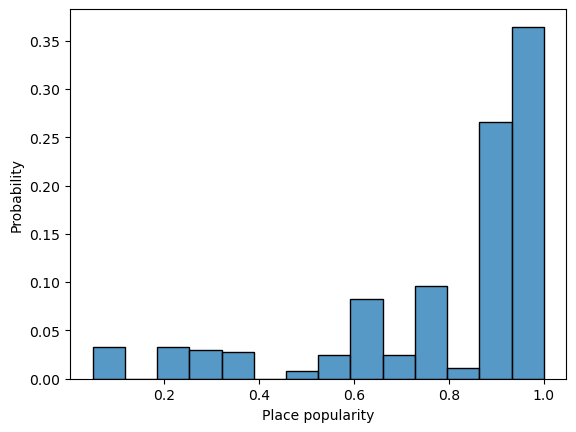

In [90]:
# Creating histoscatter plot

ax = sns.histplot(data = df_merged, x='place_popularity', stat = 'probability')
ax.set_xlabel('Place popularity')
ax.set_ylabel('Probability')

Text(0.5, 0, 'Place rating')

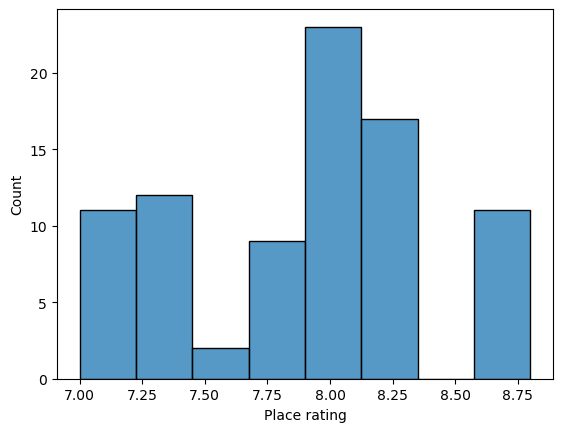

In [93]:
tx = sns.histplot(data = df_merged, x='place_rating')
tx.set_xlabel('Place rating')

# Database

##### Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [65]:
import sqlite3

# Creating SQLite database

con = sqlite3.connect('SQLite3_Bikes_Project.db') 
cur = con.cursor()

In [70]:
# Dataframe is converted directly into SQLite Database

df_merged.to_sql('bike_station', con, if_exists='replace', index=False) 
con.commit()

##### Look at the data before and after the join to validate your data.

In [72]:
with sqlite3.connect('SQLite3_Bikes_Project.db') as conn:
    df = pd.read_sql("select * from bike_station", conn)
    print(df)

            station_name  empty_slots  free_bikes  place_popularity  \
0        02 - Funicolare            5           2          0.976956   
1        02 - Funicolare            5           2          0.995855   
2        02 - Funicolare            5           2          0.990406   
3        02 - Funicolare            5           2          0.991711   
4        02 - Funicolare            5           2          0.997347   
..                   ...          ...         ...               ...   
553  11 - Como Nord Lago            8           2          0.652174   
554  11 - Como Nord Lago            8           2               NaN   
555  11 - Como Nord Lago            8           2               NaN   
556  11 - Como Nord Lago            8           2               NaN   
557  11 - Como Nord Lago            8           2               NaN   

     place_rating  place_popularity_avg  place_rating_avr  number_places  
0             8.7              0.790323          7.912500             47